In [52]:
# %load_ext autoreload
%reload_ext autoreload
%autoreload 2
import numpy as np

from src.GridWorldMDP.objectworld_utils import draw_path, generate_demonstrations, init_object_world, visitation_frequency
from src.deepmaxent_irl_objectworld import run_deepmaxent_irl
from src.maxent_irl_objectworld import run_maxent_irl
from src.img_utils import Visualizer, get_evd, draw_evd
from src.argument_parser import get_parser, parse_args_str

PARSER = get_parser()

In [58]:
from collections import defaultdict
n_exp = 8
n_train = 16
n_test = 4

# Set Seed setting
seeds = np.arange(0, n_exp*(n_train+n_test)*3)
np.random.shuffle(seeds)
exp_infos = []
for e_num in range(n_exp):
    train_seeds = seeds[e_num*n_train:(e_num+1)*n_train]
    test_seeds = seeds[n_exp*n_train+e_num*n_test:n_exp*n_train+(e_num+1)*n_test]
    train_init_start_pos = [np.random.randint(0, 16, size=(1, 2)).tolist() for _ in range(n_train)]
    test_init_start_pos = [np.random.randint(0, 16, size=(1, 2)).tolist() for _ in range(n_test)]

    info = defaultdict(list)
    for train_seed, train_init_start in zip(train_seeds, train_init_start_pos):
        info['train'].append((train_seed, train_init_start))
    for test_seed, test_init_start in zip(test_seeds, test_init_start_pos):
        info['test'].append((test_seed, test_init_start))
    exp_infos.append(info)

In [26]:
from collections import defaultdict
exp_results = defaultdict(list)
    
# Seed setting
seeds = np.arange(0, n_exp*(n_train+n_test))
np.random.shuffle(seeds)
for e_num in range(n_exp):
    train_seeds = seeds[e_num*n_train:(e_num+1)*n_train]
    test_seeds = seeds[n_exp*n_train+e_num*n_test:n_exp*n_train+(e_num+1)*n_test]
    train_init_start_pos = [np.random.randint(0, 16, size=(1, 2)).tolist() for _ in range(n_train)]
    test_init_start_pos = [np.random.randint(0, 16, size=(1, 2)).tolist() for _ in range(n_test)]

    info = defaultdict(list)
    for train_seed, train_init_start in zip(train_seeds, train_init_start_pos):
        info['train'].append((train_seed, train_init_start))
    for test_seed, test_init_start in zip(test_seeds, test_init_start_pos):
        info['test'].append((test_seed, test_init_start))
    exp_results['exp_info'].append(info)

In [32]:
np.random.seed(1)
BASIC_ARGS = """
--exp_name test
--height 6
--n_objects 50
--n_colours 6
--height 16
--width 16
--seed 2
"""
args = parse_args_str(PARSER, BASIC_ARGS)
print(args.exp_name)

init_start_pos = np.random.randint(0, args.height, size=(args.n_query, 2)).tolist()
print('start positions: ', init_start_pos)

# ow, P_a, rewards_gt, values_gt, policy_gt, feat_map = init_object_world(args)
# ow.grid

test
start positions:  [[5, 11]]


## Maxent

In [ ]:
MAXENT_ARGS = """
--exp_name maxent_rand
--type object
--n_objects 7
--n_colours 4
--height 32
--width 32
--gamma 0.8
--act_random 0.3
--n_trajs 5
--l_traj 6
--learning_rate 0.1
--n_iters 10
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--active
--seed 2
"""
args = parse_args_str(PARSER, MAXENT_ARGS)
print(args.exp_name)

history_maxent_active = run_maxent_irl(args, init_start_pos=init_start_pos)

In [ ]:
visualizer = Visualizer(history_maxent_active, file_path=None)
search_idx = 9
visualizer.draw_value_maps(search_idx)
visualizer.draw_acq_maps(search_idx)

---

## Deep Maxent

In [17]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 8
--n_colours 2
--height 6
--width 6
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 0.5
--hiddens 3 3
--device cuda
--active
--seed 2
--verbose 2
"""

[0, 2, 4]

In [33]:
DEEP_MAXENT_ACTIVE_ARGS = """
--exp_name deepmaxent_active
--type object
--n_objects 50
--n_colours 6
--height 16
--width 16
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 3.0
--hiddens 8 8
--device cuda
--active
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_ACTIVE_ARGS)
print(args.exp_name)
history_deepmaxent_active = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_active
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9999 -0.9999 -0.9997 -0.9993 -0.9986 -0.9972 -0.9946 -0.9816 -0.9547
  -0.9244 -0.8839 -0.9117 -0.9507 -0.9791 -0.9908 -0.9963]
 [-0.9998 -0.9997 -0.9995 -0.9989 -0.9978 -0.9958 -0.993  -0.9704 -0.8971
  -0.8598 -0.8147 -0.8005 -0.9117 -0.9596 -0.9835 -0.9936]
 [-0.9996 -0.9994 -0.9992 -0.9987 -0.9973 -0.9952 -0.9921 -0.9702 -0.8994
  -0.8274 -0.7867 -0.792  -0.9028 -0.9565 -0.9782 -0.9923]
 [-0.9994 -0.9992 -0.9991 -0.9986 -0.9975 -0.9959 -0.9906 -0.9636 -0.8818
  -0.7503 -0.7477 -0.7918 -0.9015 -0.9544 -0.9803 -0.9921]
 [-0.999  -0.9987 -0.9987 -0.9987 -0.9981 -0.9966 -0.9913 -0.9633 -0.8528
  -0.5829 -0.2849 -0.5259 -0.8173 -0.946  -0.9835 -0.9933]
 [-0.9972 -0.9975 -0.9976 -0.9978 -0.9973 -0.9956 -0.9918 -0.9728 -0.8479
  -0.3168  0.3896 -0.1138 -0.6042 -0.9077 -0.9757 -0.9932]
 [-0.9885 -0.9883 -0.9901 -0.9911 -0.9887 -0.9903 -0.9911 -0.978  -0.8882
  -0.5712 -0.1354 -0.2047 -0.7177 -0.9133 -0.9748 -0.9882]
 [-0.9532 -0.9567 -0.9691 -0.9656 -0.9494 -0.9585 -0.9724 -0.9747 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9889 -0.9866 -0.9854 -0.9824 -0.9804 -0.9813 -0.9831 -0.9777 -0.969
  -0.9512 -0.8897 -0.8897 -0.9444 -0.973  -0.9752 -0.9772]
 [-0.9827 -0.9772 -0.975  -0.972  -0.9689 -0.968  -0.9735 -0.9555 -0.9404
  -0.9059 -0.8047 -0.7535 -0.9031 -0.9697 -0.9649 -0.9597]
 [-0.9767 -0.9656 -0.9679 -0.9624 -0.9557 -0.9619 -0.9683 -0.9374 -0.864
  -0.7863 -0.7131 -0.7531 -0.9073 -0.9479 -0.9593 -0.9674]
 [-0.9658 -0.9689 -0.9733 -0.9703 -0.9633 -0.9611 -0.9534 -0.9008 -0.7555
  -0.5005 -0.5702 -0.7904 -0.8751 -0.9297 -0.9573 -0.9717]
 [-0.9507 -0.9586 -0.9703 -0.9825 -0.9824 -0.9677 -0.9424 -0.8672 -0.5519
   0.2233  0.1533 -0.2753 -0.7354 -0.8996 -0.9598 -0.967 ]
 [-0.9    -0.9301 -0.9614 -0.979  -0.9828 -0.9698 -0.9462 -0.8807 -0.4118
   0.5197  0.4961 -0.2409 -0.7724 -0.8966 -0.9312 -0.9524]
 [-0.7185 -0.8096 -0.903  -0.9543 -0.9568 -0.9618 -0.9465 -0.8703 -0.5468
  -0.194  -0.4396 -0.579  -0.8172 -0.8704 -0.8809 -0.8949]
 [-0.1692 -0.4706 -0.8033 -0.901  -0.8767 -0.9083 -0.9337 -0.8785 -0.73

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.3929 -0.3819 -0.3118 -0.1691  0.0283  0.1995  0.2918  0.2951  0.2439
   0.1557  0.1438  0.0336 -0.0622 -0.1813 -0.1248 -0.0249]
 [-0.4512 -0.458  -0.3969 -0.2547 -0.0434  0.1472  0.2371  0.3131  0.3029
   0.1743  0.1062 -0.0288 -0.0999 -0.2603 -0.1574 -0.0168]
 [-0.4805 -0.5058 -0.4512 -0.3248 -0.1061  0.0106  0.1188  0.2421  0.3446
   0.2473  0.1206  0.0034 -0.1877 -0.2956 -0.1682 -0.0755]
 [-0.452  -0.4935 -0.4862 -0.3866 -0.2402 -0.1443 -0.0264  0.1235  0.2882
   0.3561  0.1794 -0.0344 -0.1175 -0.236  -0.1774 -0.0803]
 [-0.3865 -0.4483 -0.4616 -0.4662 -0.3985 -0.3057 -0.1838 -0.0273  0.2328
   0.4075  0.3521  0.2085  0.0071 -0.0573 -0.1298 -0.026 ]
 [-0.3187 -0.4115 -0.4181 -0.453  -0.4766 -0.4129 -0.328  -0.2077  0.1968
   0.4471  0.4275  0.2765  0.0714  0.0225  0.0332  0.0649]
 [-0.1935 -0.2658 -0.2768 -0.3839 -0.415  -0.4262 -0.4034 -0.1892  0.127
   0.256   0.2094  0.2491  0.1036  0.0612  0.1277  0.23  ]
 [-0.0055 -0.0092 -0.1049 -0.2809 -0.2821 -0.3038 -0.3193 -0.1271  0.0

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.663  -0.6416 -0.6102 -0.5642 -0.5075 -0.4626 -0.4433 -0.4195 -0.3684
  -0.2779 -0.1284 -0.0353 -0.0722 -0.1255 -0.0934 -0.0537]
 [-0.6476 -0.6449 -0.6052 -0.555  -0.4892 -0.4379 -0.417  -0.367  -0.336
  -0.1951  0.0062  0.117   0.0635 -0.1178 -0.0373  0.024 ]
 [-0.6319 -0.6346 -0.6145 -0.5506 -0.4708 -0.4377 -0.411  -0.3262 -0.1841
  -0.0471  0.1343  0.2156  0.1539  0.0325  0.0195 -0.0213]
 [-0.608  -0.6202 -0.6212 -0.5718 -0.4846 -0.4473 -0.3986 -0.2866 -0.075
   0.1734  0.2266  0.2526  0.1988  0.1832  0.0491 -0.0673]
 [-0.5767 -0.596  -0.5991 -0.5891 -0.5435 -0.4823 -0.407  -0.2766  0.0164
   0.343   0.3694  0.2946  0.2842  0.159  -0.0012 -0.08  ]
 [-0.5269 -0.5692 -0.567  -0.5717 -0.5523 -0.525  -0.4581 -0.3248  0.011
   0.3679  0.3891  0.2704  0.1489  0.0269 -0.0548 -0.1104]
 [-0.4194 -0.4654 -0.4875 -0.5376 -0.5264 -0.521  -0.5025 -0.3378 -0.056
   0.1659  0.1672  0.1401 -0.0076 -0.1218 -0.1184 -0.0596]
 [-0.1841 -0.2714 -0.4154 -0.5064 -0.4607 -0.4379 -0.4354 -0.3283 -0.1299

  0%|          | 0/20 [00:00<?, ?it/s]

[[-9.921e-01 -9.885e-01 -9.838e-01 -9.777e-01 -9.708e-01 -9.651e-01
  -9.605e-01 -9.271e-01 -8.444e-01 -6.201e-01 -1.414e-01 -1.110e-02
  -2.589e-01 -4.097e-01 -5.704e-01 -7.185e-01]
 [-9.872e-01 -9.833e-01 -9.763e-01 -9.680e-01 -9.570e-01 -9.522e-01
  -9.444e-01 -9.088e-01 -8.279e-01 -5.251e-01  3.750e-02  3.715e-01
   7.900e-03 -1.973e-01 -4.058e-01 -6.088e-01]
 [-9.818e-01 -9.731e-01 -9.722e-01 -9.605e-01 -9.426e-01 -9.275e-01
  -9.118e-01 -8.565e-01 -7.624e-01 -4.643e-01  1.139e-01  3.940e-01
   4.250e-01  1.252e-01 -2.571e-01 -6.178e-01]
 [-9.791e-01 -9.753e-01 -9.749e-01 -9.646e-01 -9.220e-01 -8.988e-01
  -8.537e-01 -7.232e-01 -5.193e-01 -2.121e-01  1.870e-01  4.843e-01
   3.779e-01  1.831e-01 -2.675e-01 -6.402e-01]
 [-9.783e-01 -9.767e-01 -9.747e-01 -9.606e-01 -9.264e-01 -8.848e-01
  -7.900e-01 -5.216e-01 -1.227e-01  2.177e-01  4.302e-01  3.256e-01
   3.117e-01  4.240e-02 -4.149e-01 -6.748e-01]
 [-9.652e-01 -9.725e-01 -9.659e-01 -9.494e-01 -9.086e-01 -8.951e-01
  -8.026e-01 -3.4

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9143 -0.896  -0.8744 -0.8471 -0.8174 -0.7921 -0.7727 -0.6964 -0.5715
  -0.3445 -0.0128  0.0289 -0.1584 -0.2994 -0.4153 -0.5127]
 [-0.8961 -0.8812 -0.8536 -0.8221 -0.7834 -0.764  -0.7425 -0.6731 -0.565
  -0.2929  0.0594  0.2187 -0.0408 -0.2188 -0.3393 -0.4473]
 [-0.881  -0.8583 -0.848  -0.8068 -0.7527 -0.7167 -0.6833 -0.6023 -0.4926
  -0.2521  0.0985  0.2395  0.2278 -0.0469 -0.2534 -0.4496]
 [-0.8749 -0.8661 -0.8615 -0.8215 -0.7157 -0.671  -0.6005 -0.4472 -0.2524
  -0.0335  0.1702  0.3164  0.2212  0.0148 -0.2364 -0.4475]
 [-0.8721 -0.8698 -0.8613 -0.8198 -0.7348 -0.6585 -0.5233 -0.2421  0.0564
   0.2428  0.3318  0.2147  0.1541  0.0196 -0.2686 -0.4435]
 [-0.8395 -0.8608 -0.8395 -0.7999 -0.7255 -0.6918 -0.5531 -0.0879  0.1414
   0.4183  0.4696  0.269   0.096  -0.2104 -0.3459 -0.4739]
 [-0.7382 -0.7632 -0.7765 -0.7803 -0.7328 -0.7227 -0.6789 -0.3645 -0.0821
   0.2368  0.3821  0.1304 -0.1491 -0.3727 -0.4827 -0.4919]
 [-0.4816 -0.5851 -0.7101 -0.7733 -0.6853 -0.6286 -0.5992 -0.4653 -0.3

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.779  -0.7571 -0.7315 -0.7018 -0.6719 -0.6459 -0.6227 -0.5259 -0.3618
  -0.0957  0.1878  0.2289  0.0808 -0.0665 -0.2664 -0.4209]
 [-0.7485 -0.7311 -0.7041 -0.6723 -0.6348 -0.618  -0.5929 -0.513  -0.3839
  -0.0749  0.2351  0.3893  0.1775  0.0521 -0.1936 -0.3862]
 [-0.7228 -0.692  -0.6902 -0.6553 -0.6044 -0.5646 -0.5252 -0.4381 -0.3313
  -0.1033  0.2251  0.3753  0.4151  0.1568 -0.1023 -0.3602]
 [-0.7181 -0.7043 -0.7039 -0.6657 -0.5593 -0.5128 -0.432  -0.2638 -0.0926
   0.0528  0.2408  0.4109  0.3459  0.1237 -0.1191 -0.3339]
 [-0.7198 -0.7153 -0.7054 -0.6527 -0.5601 -0.4864 -0.3411 -0.0462  0.2089
   0.2935  0.371   0.248   0.1891  0.0981 -0.1594 -0.3305]
 [-0.6814 -0.7062 -0.6804 -0.6309 -0.5394 -0.4989 -0.3438  0.1341  0.2907
   0.4882  0.5337  0.3252  0.1743 -0.1167 -0.2302 -0.3526]
 [-0.5667 -0.5939 -0.6104 -0.6084 -0.5537 -0.536  -0.4749 -0.1603  0.0654
   0.329   0.4752  0.2077 -0.0521 -0.2549 -0.3577 -0.3742]
 [-0.3236 -0.4179 -0.5388 -0.5997 -0.5036 -0.434  -0.3884 -0.2769 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[0.2604 0.2589 0.26   0.2662 0.2744 0.2772 0.2733 0.305  0.3437 0.4022
  0.4619 0.4701 0.4236 0.3704 0.319  0.2885]
 [0.257  0.2486 0.2555 0.2616 0.2733 0.2681 0.2621 0.2854 0.3098 0.3956
  0.4751 0.5086 0.4355 0.3703 0.3164 0.2715]
 [0.2498 0.2432 0.2345 0.2522 0.2728 0.2729 0.2735 0.3017 0.3399 0.3959
  0.484  0.5192 0.5057 0.395  0.3455 0.2927]
 [0.2236 0.21   0.1931 0.2193 0.2759 0.2791 0.2989 0.3529 0.4135 0.4653
  0.5089 0.5423 0.503  0.4115 0.3582 0.3223]
 [0.194  0.168  0.1628 0.1942 0.245  0.2712 0.3227 0.4118 0.5075 0.5456
  0.55   0.4887 0.4539 0.4411 0.3787 0.3444]
 [0.2003 0.1432 0.152  0.1771 0.2207 0.2478 0.312  0.4631 0.5252 0.5894
  0.6011 0.5    0.4451 0.3853 0.3746 0.3617]
 [0.2598 0.2119 0.1848 0.1719 0.2033 0.2252 0.2536 0.3826 0.4517 0.5147
  0.541  0.4348 0.379  0.3408 0.3341 0.3654]
 [0.3449 0.2917 0.2158 0.1611 0.228  0.2783 0.3164 0.3678 0.3755 0.4281
  0.4375 0.3465 0.311  0.3116 0.3492 0.3885]
 [0.3825 0.3096 0.2338 0.2087 0.2496 0.3382 0.3621 0.4105 0.3902

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.6943 -0.668  -0.641  -0.6153 -0.5924 -0.5707 -0.5476 -0.4803 -0.376
  -0.2002  0.0115  0.0639 -0.0246 -0.1201 -0.2725 -0.3859]
 [-0.6584 -0.6399 -0.6111 -0.5844 -0.5579 -0.5422 -0.5206 -0.4625 -0.3787
  -0.1795  0.0652  0.2111  0.0719 -0.0069 -0.2007 -0.3504]
 [-0.6259 -0.5962 -0.592  -0.5629 -0.5292 -0.4982 -0.469  -0.4137 -0.3511
  -0.201   0.0785  0.2347  0.2737  0.1148 -0.1127 -0.318 ]
 [-0.6105 -0.5916 -0.589  -0.5612 -0.4937 -0.4568 -0.4031 -0.3107 -0.2215
  -0.1096  0.1071  0.2985  0.2361  0.1106 -0.1073 -0.297 ]
 [-0.6026 -0.5897 -0.5796 -0.5409 -0.4822 -0.4278 -0.3381 -0.1721 -0.0175
   0.0427  0.1616  0.1248  0.135   0.0531 -0.1423 -0.3107]
 [-0.5645 -0.5705 -0.5529 -0.5179 -0.4484 -0.4178 -0.3175 -0.0241  0.0433
   0.1784  0.2808  0.152   0.1218 -0.1    -0.233  -0.3478]
 [-0.485  -0.4892 -0.498  -0.4922 -0.4441 -0.4176 -0.3714 -0.2057 -0.0895
   0.0986  0.253   0.0402 -0.0895 -0.2331 -0.3319 -0.3683]
 [-0.3667 -0.3959 -0.4496 -0.4745 -0.401  -0.3353 -0.2945 -0.2653 -0.2

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7371 -0.7157 -0.6917 -0.6651 -0.6373 -0.6153 -0.6067 -0.6004 -0.5489
  -0.4091 -0.176  -0.0791 -0.1719 -0.1829 -0.2188 -0.2388]
 [-0.7236 -0.7144 -0.6723 -0.6375 -0.6    -0.5792 -0.5596 -0.5708 -0.5489
  -0.3551 -0.0533  0.1524  0.0017 -0.063  -0.1281 -0.1429]
 [-0.7086 -0.7034 -0.6728 -0.6079 -0.5532 -0.513  -0.4789 -0.4826 -0.4591
  -0.2903  0.0819  0.2951  0.3922  0.2108 -0.0241 -0.1483]
 [-0.6931 -0.6871 -0.6752 -0.6077 -0.4833 -0.4267 -0.3884 -0.3538 -0.2916
  -0.1058  0.2182  0.4739  0.414   0.3334  0.0779 -0.1508]
 [-0.6762 -0.6733 -0.6566 -0.5851 -0.4547 -0.3724 -0.2921 -0.1828 -0.0489
   0.1041  0.2784  0.2608  0.3472  0.2537  0.0609 -0.1415]
 [-0.6542 -0.6637 -0.6275 -0.5646 -0.4363 -0.4251 -0.3082  0.0127  0.0345
   0.2372  0.3843  0.2583  0.2432  0.0072 -0.1318 -0.2303]
 [-0.61   -0.6154 -0.6079 -0.5932 -0.5294 -0.4875 -0.4438 -0.2223 -0.1104
   0.1699  0.3947  0.1388 -0.0343 -0.233  -0.3209 -0.2977]
 [-0.4972 -0.5283 -0.5838 -0.6385 -0.5571 -0.4661 -0.3895 -0.3005 -0.

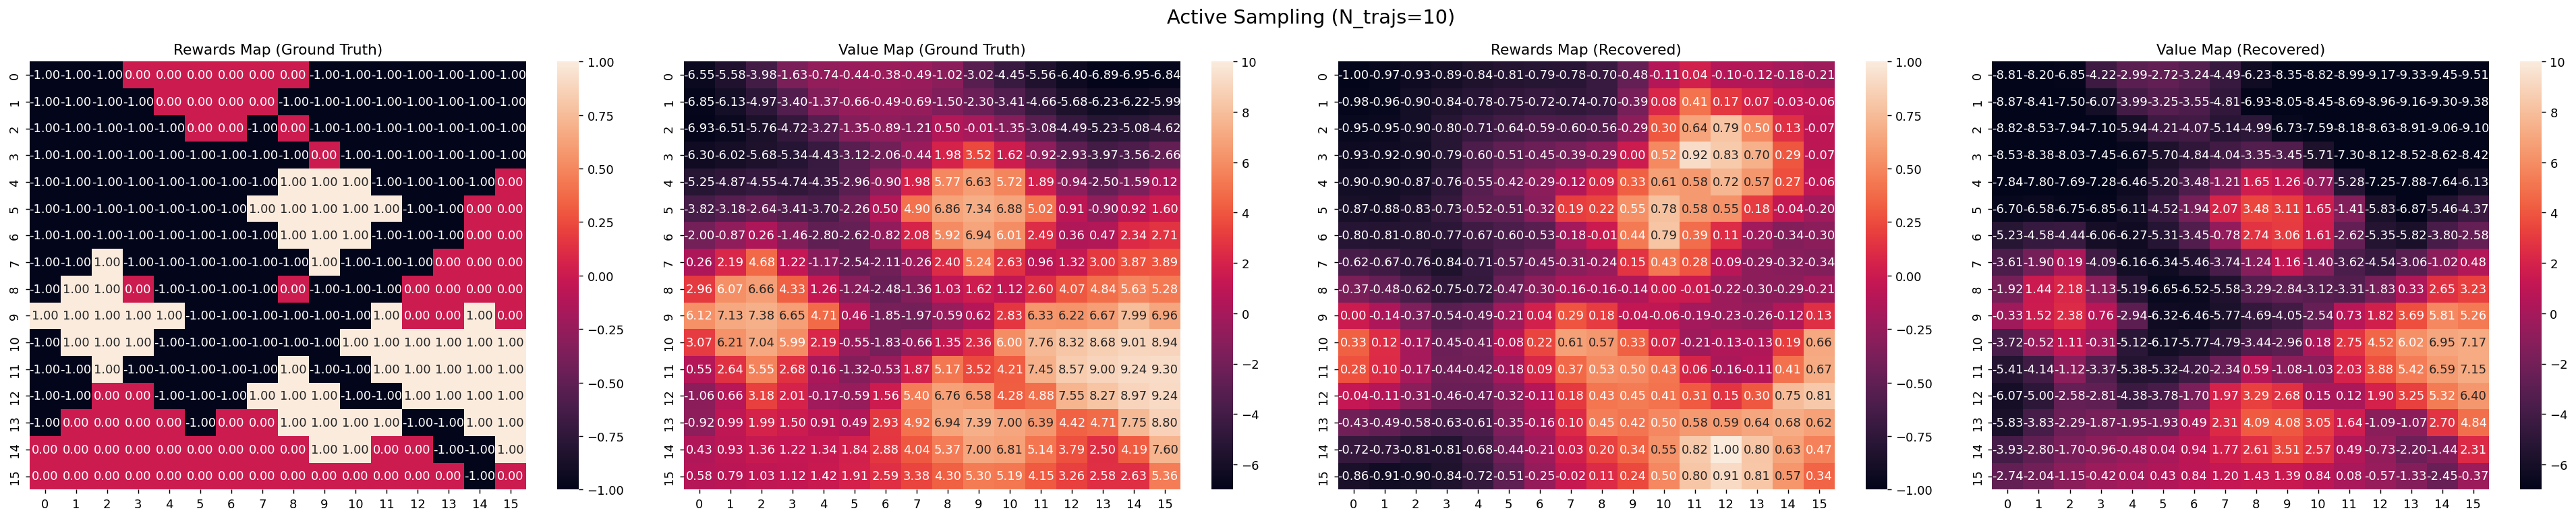

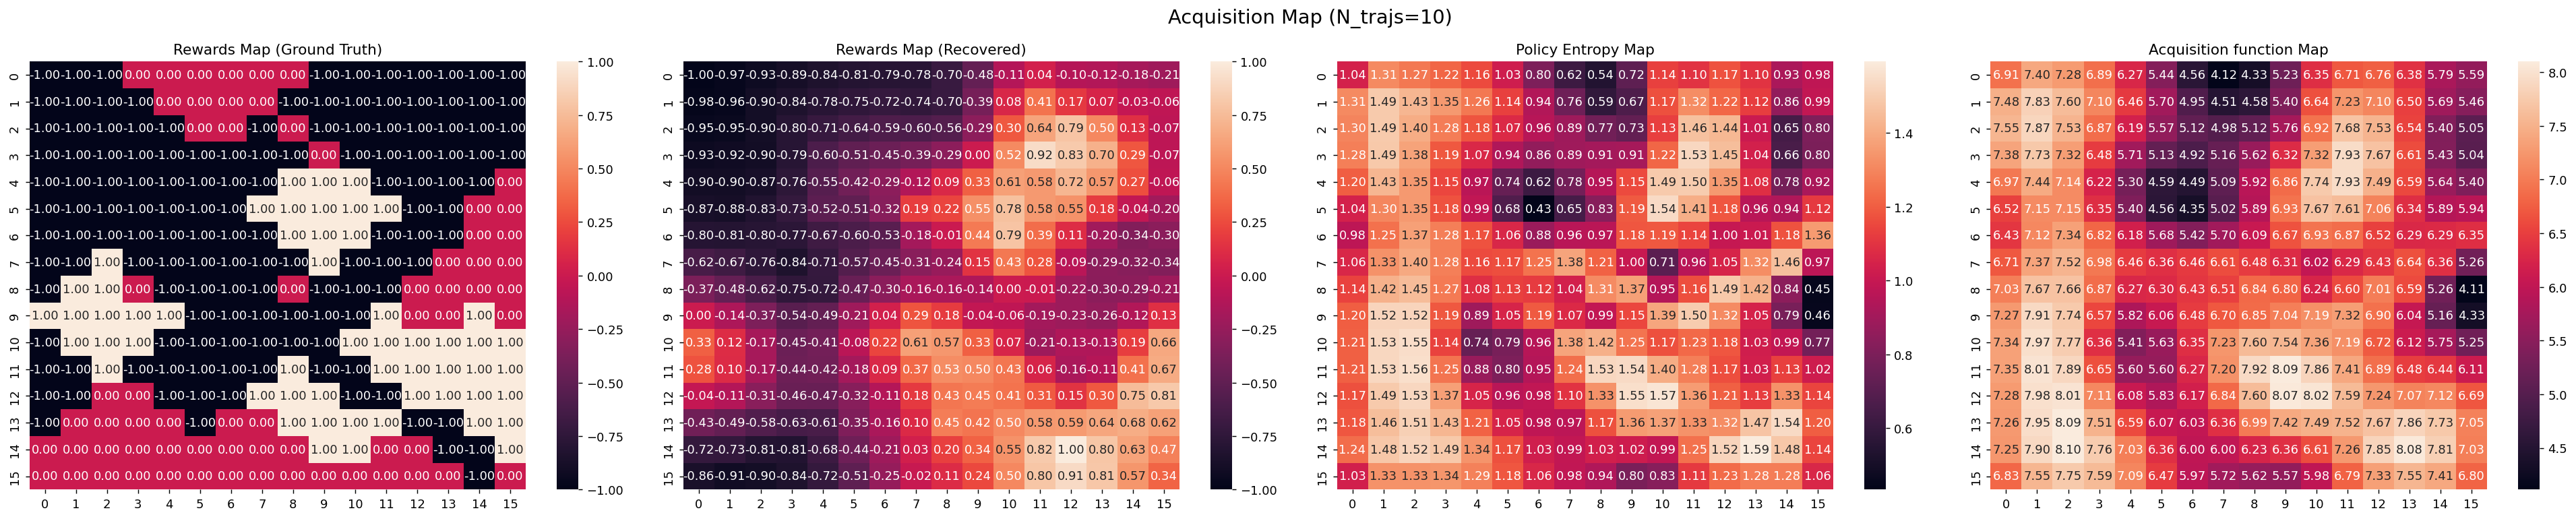

In [46]:
visualizer = Visualizer(history_deepmaxent_active, file_path=None, figsize=(30, 6), dpi=130)
n_trajs = 10
visualizer.draw_value_maps(search_idx=n_trajs)
visualizer.draw_acq_maps(search_idx=n_trajs)

## Random

In [47]:
DEEP_MAXENT_RANDOM_ARGS = """
--exp_name deepmaxent_random
--type object
--n_objects 50
--n_colours 6
--height 16
--width 16
--gamma 0.9
--act_random 0.3
--n_trajs 10
--l_traj 8
--learning_rate 0.05
--n_iters 20
--alpha 0.1
--n_query 1
--r_max 1
--error 0.01
--grad_clip 0.5
--weight_decay 3.0
--hiddens 8 8
--device cuda
--seed 2
--verbose 2
"""

# becareful of learning rate will cause nan
args = parse_args_str(PARSER, DEEP_MAXENT_RANDOM_ARGS)
print(args.exp_name)
history_deepmaxent_random = run_deepmaxent_irl(args, init_start_pos=init_start_pos)

deepmaxent_random
[INFO] Initialize Object World
[INFO] Getting ground truth values and policy via value iteration
[INFO] Initialize trajectories
Visitation Frequency
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 3 3 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[INFO - n_trajs:1] Training Deep MaxEnt IRL


  0%|          | 0/20 [00:00<?, ?it/s]

[[-1.     -1.     -0.9999 -0.9997 -0.9993 -0.9981 -0.9953 -0.9773 -0.9333
  -0.8766 -0.7997 -0.871  -0.941  -0.9819 -0.9924 -0.9967]
 [-1.     -1.     -0.9999 -0.9997 -0.999  -0.9977 -0.996  -0.9714 -0.8474
  -0.765  -0.6774 -0.6987 -0.9    -0.9701 -0.9864 -0.9943]
 [-0.9999 -0.9999 -0.9999 -0.9997 -0.999  -0.9981 -0.9968 -0.9828 -0.8802
  -0.6991 -0.5841 -0.6213 -0.9201 -0.9663 -0.9796 -0.9931]
 [-0.9999 -0.9999 -0.9998 -0.9997 -0.9993 -0.9988 -0.9971 -0.9848 -0.9035
  -0.5236 -0.3606 -0.5055 -0.8744 -0.9431 -0.9797 -0.9927]
 [-0.9998 -0.9998 -0.9997 -0.9997 -0.9996 -0.9992 -0.9979 -0.9892 -0.912
  -0.3554  0.3638  0.1991 -0.5002 -0.9109 -0.9814 -0.9939]
 [-0.9995 -0.9995 -0.9995 -0.9995 -0.9994 -0.9991 -0.9984 -0.9943 -0.9363
  -0.2861  0.7609  0.5579  0.2663 -0.7504 -0.9667 -0.9935]
 [-0.9977 -0.9976 -0.9974 -0.9978 -0.9969 -0.9975 -0.9982 -0.9948 -0.9511
  -0.5778  0.2224  0.3858 -0.2954 -0.8152 -0.9676 -0.9881]
 [-0.9879 -0.9878 -0.9913 -0.9895 -0.9783 -0.9815 -0.9897 -0.9912 -0.9

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.992  -0.9905 -0.9872 -0.9788 -0.9635 -0.936  -0.8911 -0.7623 -0.5739
  -0.308   0.0182 -0.2825 -0.718  -0.9083 -0.964  -0.9822]
 [-0.9894 -0.99   -0.9856 -0.9761 -0.9554 -0.9252 -0.8662 -0.7294 -0.5859
  -0.2047  0.1613 -0.0376 -0.6641 -0.8749 -0.9506 -0.9807]
 [-0.986  -0.9879 -0.9869 -0.9756 -0.9477 -0.8925 -0.7666 -0.5018 -0.1763
   0.0301  0.3415  0.2732 -0.237  -0.7902 -0.8881 -0.9574]
 [-0.9821 -0.9868 -0.9901 -0.9834 -0.9407 -0.8501 -0.5912  0.041   0.5409
   0.598   0.5942  0.5289 -0.0173 -0.7394 -0.8405 -0.8877]
 [-0.9758 -0.9842 -0.9886 -0.9854 -0.9627 -0.8552 -0.3642  0.5251  0.814
   0.8153  0.7429  0.3056 -0.3066 -0.3823 -0.7007 -0.7595]
 [-0.9509 -0.9762 -0.9811 -0.9822 -0.9747 -0.9126 -0.4227  0.7188  0.8379
   0.8737  0.8354  0.473  -0.1418 -0.5334 -0.5041 -0.5569]
 [-0.8261 -0.9092 -0.9513 -0.9695 -0.9601 -0.9306 -0.7149  0.4925  0.7148
   0.7583  0.7093  0.0115 -0.4016 -0.4886 -0.4552 -0.1049]
 [-0.4576 -0.6362 -0.8377 -0.9456 -0.8944 -0.7929 -0.4955  0.3355  0.2

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9666 -0.9598 -0.9401 -0.8919 -0.7893 -0.6143 -0.389  -0.1033  0.0418
   0.0568  0.0812 -0.0912 -0.3688 -0.6496 -0.7712 -0.8334]
 [-0.9607 -0.9646 -0.9485 -0.906  -0.806  -0.6299 -0.3729 -0.0036  0.1773
   0.1946  0.2318  0.0597 -0.2833 -0.5776 -0.7236 -0.8264]
 [-0.9522 -0.9612 -0.9562 -0.9225 -0.8293 -0.6807 -0.4053  0.0609  0.4123
   0.3761  0.3478  0.2226 -0.1683 -0.5511 -0.5813 -0.7308]
 [-0.9323 -0.9516 -0.9609 -0.9423 -0.8708 -0.7466 -0.4567  0.0931  0.5451
   0.6153  0.4586  0.2538 -0.0943 -0.4911 -0.5515 -0.5762]
 [-0.8929 -0.9291 -0.9476 -0.9508 -0.9238 -0.8269 -0.5405  0.0742  0.6417
   0.7402  0.6606  0.3131 -0.1005 -0.2308 -0.458  -0.4512]
 [-0.7998 -0.887  -0.9123 -0.9357 -0.9405 -0.8841 -0.6707 -0.0388  0.6192
   0.7741  0.7424  0.4903  0.0559 -0.2063 -0.2269 -0.2832]
 [-0.5128 -0.6844 -0.7887 -0.8728 -0.8846 -0.8681 -0.756  -0.106   0.4589
   0.5974  0.524   0.3219 -0.0023 -0.1204 -0.095   0.1182]
 [-0.0565 -0.1864 -0.4515 -0.7317 -0.707  -0.68   -0.5708 -0.0721  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7399 -0.734  -0.6654 -0.4982 -0.2157  0.0835  0.3063  0.4808  0.4942
   0.4049  0.3412  0.1471 -0.1125 -0.4334 -0.5324 -0.5482]
 [-0.7789 -0.8133 -0.7655 -0.6381 -0.3775 -0.076   0.1803  0.4665  0.5393
   0.4407  0.3823  0.1609 -0.1502 -0.4728 -0.5494 -0.5987]
 [-0.8007 -0.8507 -0.8331 -0.7406 -0.5223 -0.3176 -0.0356  0.3824  0.6318
   0.539   0.4181  0.2288 -0.2061 -0.5444 -0.4563 -0.5078]
 [-0.7824 -0.8505 -0.8707 -0.8203 -0.6835 -0.5434 -0.253   0.2583  0.6458
   0.7002  0.4805  0.1592 -0.1556 -0.4916 -0.4532 -0.3512]
 [-0.7282 -0.8254 -0.8581 -0.8658 -0.8245 -0.7171 -0.4632  0.0908  0.6687
   0.7877  0.697   0.3342 -0.121  -0.1945 -0.3415 -0.2191]
 [-0.6186 -0.7893 -0.8192 -0.8534 -0.8665 -0.8074 -0.6375 -0.1505  0.6185
   0.8191  0.7942  0.5301  0.0779 -0.0887 -0.0432 -0.0042]
 [-0.2867 -0.5408 -0.657  -0.7753 -0.8013 -0.7949 -0.7231 -0.1781  0.4565
   0.6067  0.5285  0.4051  0.1004  0.0132  0.1034  0.3459]
 [ 0.167   0.0022 -0.2907 -0.609  -0.5969 -0.5979 -0.5324 -0.0654  0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.7744 -0.7497 -0.6113 -0.2673  0.2664  0.6229  0.7612  0.7843  0.7552
   0.6669  0.5722  0.401   0.2825  0.0347  0.0317  0.1261]
 [-0.8295 -0.8534 -0.7761 -0.5197  0.023   0.503   0.6915  0.7713  0.773
   0.6622  0.5291  0.2497  0.1764 -0.0604 -0.0089  0.0607]
 [-0.8496 -0.8949 -0.8461 -0.6808 -0.2112  0.2105  0.541   0.7002  0.7736
   0.6911  0.5458  0.3847  0.0076 -0.222   0.0924  0.1576]
 [-0.8047 -0.864  -0.8614 -0.7569 -0.5151 -0.1968  0.2312  0.5373  0.7133
   0.7382  0.5944  0.3853  0.1538 -0.0805  0.0859  0.306 ]
 [-0.6866 -0.7898 -0.8105 -0.8173 -0.7386 -0.5524 -0.2039  0.2359  0.6288
   0.7269  0.6767  0.5333  0.3215  0.2823  0.2216  0.4056]
 [-0.5557 -0.715  -0.7196 -0.7791 -0.8303 -0.7383 -0.5291 -0.1976  0.5313
   0.7164  0.7053  0.6222  0.5059  0.4624  0.4831  0.5203]
 [-0.3248 -0.4422 -0.4263 -0.625  -0.7057 -0.7171 -0.65   -0.1124  0.4596
   0.5816  0.5482  0.611   0.5281  0.5267  0.5888  0.6807]
 [-0.0609  0.055   0.037  -0.2986 -0.3741 -0.4148 -0.3752  0.1001  0.4

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9794 -0.9727 -0.9444 -0.8308 -0.3631  0.4166  0.7785  0.8784  0.8744
   0.7698  0.6337  0.3432  0.1558 -0.1919 -0.2074 -0.1624]
 [-0.9818 -0.9823 -0.9707 -0.9169 -0.6492  0.0936  0.6497  0.8729  0.9151
   0.7873  0.5786  0.183   0.0312 -0.1799 -0.2087 -0.2087]
 [-0.982  -0.9847 -0.9785 -0.9549 -0.826  -0.5112  0.1634  0.7356  0.8888
   0.796   0.5058  0.1749 -0.39   -0.5702 -0.175  -0.1878]
 [-0.9739 -0.9805 -0.9799 -0.9663 -0.928  -0.847  -0.5499  0.2136  0.7538
   0.8042  0.4247 -0.1226 -0.4253 -0.5917 -0.4062 -0.1538]
 [-0.9532 -0.9674 -0.9712 -0.9733 -0.9633 -0.9383 -0.8634 -0.5584  0.4245
   0.7634  0.7293  0.4246 -0.1203 -0.3338 -0.4755 -0.2473]
 [-0.913  -0.9473 -0.9485 -0.9614 -0.9726 -0.9615 -0.9337 -0.8643  0.0574
   0.7767  0.8404  0.7466  0.444   0.1144 -0.0655 -0.1833]
 [-0.7785 -0.8327 -0.8346 -0.9049 -0.9359 -0.9501 -0.9469 -0.8334 -0.0949
   0.5006  0.6149  0.7894  0.5437  0.31    0.2087  0.2767]
 [-0.4592 -0.343  -0.4058 -0.6751 -0.7834 -0.8608 -0.8898 -0.744  -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-9.858e-01 -9.814e-01 -9.651e-01 -9.133e-01 -7.422e-01 -2.666e-01
   3.500e-01  6.274e-01  6.114e-01  3.674e-01  1.177e-01 -4.736e-01
  -7.454e-01 -9.093e-01 -9.424e-01 -9.546e-01]
 [-9.870e-01 -9.870e-01 -9.774e-01 -9.413e-01 -8.106e-01 -4.311e-01
   8.020e-02  6.137e-01  7.148e-01  3.995e-01 -3.940e-02 -5.933e-01
  -7.973e-01 -9.166e-01 -9.408e-01 -9.545e-01]
 [-9.870e-01 -9.896e-01 -9.833e-01 -9.605e-01 -8.667e-01 -6.806e-01
  -2.700e-01  3.805e-01  6.872e-01  4.513e-01 -6.840e-02 -4.951e-01
  -8.545e-01 -9.429e-01 -9.224e-01 -9.334e-01]
 [-9.807e-01 -9.863e-01 -9.859e-01 -9.707e-01 -9.331e-01 -8.479e-01
  -5.886e-01  2.820e-02  5.723e-01  6.263e-01  1.044e-01 -4.915e-01
  -8.003e-01 -9.278e-01 -9.169e-01 -8.853e-01]
 [-9.642e-01 -9.758e-01 -9.795e-01 -9.823e-01 -9.712e-01 -9.306e-01
  -7.945e-01 -3.649e-01  4.566e-01  6.384e-01  5.337e-01 -5.210e-02
  -6.757e-01 -7.860e-01 -8.596e-01 -8.228e-01]
 [-9.327e-01 -9.587e-01 -9.653e-01 -9.774e-01 -9.845e-01 -9.602e-01
  -8.884e-01 -6.6

  0%|          | 0/20 [00:00<?, ?it/s]

[[-0.9326 -0.922  -0.8889 -0.7977 -0.5144  0.1028  0.5911  0.8289  0.8427
   0.7416  0.6321  0.0487 -0.4858 -0.7982 -0.8625 -0.8879]
 [-0.9382 -0.9359 -0.9171 -0.8585 -0.6681 -0.2225  0.2639  0.7569  0.8697
   0.6911  0.3975 -0.251  -0.6643 -0.819  -0.8676 -0.8934]
 [-0.9416 -0.943  -0.9309 -0.8971 -0.7786 -0.5805 -0.1615  0.5013  0.7855
   0.6143  0.1779 -0.3201 -0.7593 -0.8717 -0.8532 -0.8751]
 [-0.9364 -0.9426 -0.9408 -0.9168 -0.8645 -0.7891 -0.5431  0.1509  0.6552
   0.6935  0.221  -0.4017 -0.7233 -0.8706 -0.8598 -0.8314]
 [-0.9253 -0.9351 -0.9367 -0.935  -0.9141 -0.8755 -0.7553 -0.2729  0.5475
   0.6929  0.6417  0.1029 -0.6431 -0.7269 -0.8101 -0.7831]
 [-0.9016 -0.9243 -0.9239 -0.9281 -0.9335 -0.9042 -0.8406 -0.5889  0.4094
   0.7939  0.8727  0.6069  0.0759 -0.3897 -0.5397 -0.6402]
 [-0.8242 -0.855  -0.859  -0.8779 -0.8872 -0.8933 -0.8772 -0.6657  0.0648
   0.5216  0.6709  0.6232  0.1883 -0.123  -0.3345 -0.2741]
 [-0.6668 -0.6425 -0.6614 -0.7278 -0.7093 -0.7397 -0.7441 -0.5439 -0.

  0%|          | 0/20 [00:00<?, ?it/s]

[[-8.544e-01 -8.447e-01 -8.011e-01 -6.937e-01 -4.459e-01 -2.000e-04
   4.398e-01  7.046e-01  6.891e-01  4.561e-01  1.480e-01 -3.968e-01
  -6.329e-01 -8.031e-01 -8.534e-01 -8.755e-01]
 [-8.622e-01 -8.609e-01 -8.404e-01 -7.607e-01 -5.633e-01 -1.995e-01
   1.801e-01  6.531e-01  7.655e-01  4.444e-01 -4.460e-02 -5.216e-01
  -7.084e-01 -8.150e-01 -8.593e-01 -8.825e-01]
 [-8.673e-01 -8.736e-01 -8.551e-01 -8.129e-01 -6.689e-01 -4.784e-01
  -1.512e-01  4.062e-01  6.775e-01  4.029e-01 -1.865e-01 -5.508e-01
  -7.801e-01 -8.624e-01 -8.527e-01 -8.671e-01]
 [-8.556e-01 -8.722e-01 -8.723e-01 -8.355e-01 -7.768e-01 -6.884e-01
  -4.494e-01  9.200e-02  5.354e-01  5.219e-01 -1.310e-01 -6.122e-01
  -7.625e-01 -8.658e-01 -8.574e-01 -8.339e-01]
 [-8.301e-01 -8.553e-01 -8.633e-01 -8.694e-01 -8.450e-01 -7.952e-01
  -6.562e-01 -2.455e-01  4.311e-01  5.592e-01  4.099e-01 -2.245e-01
  -7.198e-01 -7.726e-01 -8.199e-01 -7.917e-01]
 [-7.789e-01 -8.303e-01 -8.373e-01 -8.572e-01 -8.768e-01 -8.275e-01
  -7.458e-01 -5.1

  0%|          | 0/20 [00:00<?, ?it/s]

[[-9.654e-01 -9.612e-01 -9.388e-01 -8.678e-01 -6.409e-01 -4.870e-02
   5.685e-01  7.882e-01  7.475e-01  4.258e-01 -6.630e-02 -6.601e-01
  -8.317e-01 -9.340e-01 -9.581e-01 -9.682e-01]
 [-9.676e-01 -9.678e-01 -9.574e-01 -9.084e-01 -7.395e-01 -2.648e-01
   3.078e-01  7.651e-01  8.364e-01  4.614e-01 -2.437e-01 -7.595e-01
  -8.738e-01 -9.353e-01 -9.570e-01 -9.687e-01]
 [-9.673e-01 -9.717e-01 -9.617e-01 -9.353e-01 -8.178e-01 -5.806e-01
  -7.090e-02  5.641e-01  7.932e-01  5.038e-01 -2.804e-01 -7.138e-01
  -9.086e-01 -9.537e-01 -9.490e-01 -9.580e-01]
 [-9.561e-01 -9.645e-01 -9.636e-01 -9.429e-01 -9.002e-01 -7.960e-01
  -4.671e-01  2.336e-01  6.896e-01  6.758e-01 -4.920e-02 -7.062e-01
  -8.765e-01 -9.512e-01 -9.470e-01 -9.323e-01]
 [-9.301e-01 -9.460e-01 -9.510e-01 -9.572e-01 -9.434e-01 -8.938e-01
  -7.282e-01 -1.955e-01  5.994e-01  7.063e-01  5.343e-01 -2.160e-01
  -8.210e-01 -8.739e-01 -9.137e-01 -8.853e-01]
 [-8.857e-01 -9.182e-01 -9.265e-01 -9.456e-01 -9.611e-01 -9.229e-01
  -8.309e-01 -5.5

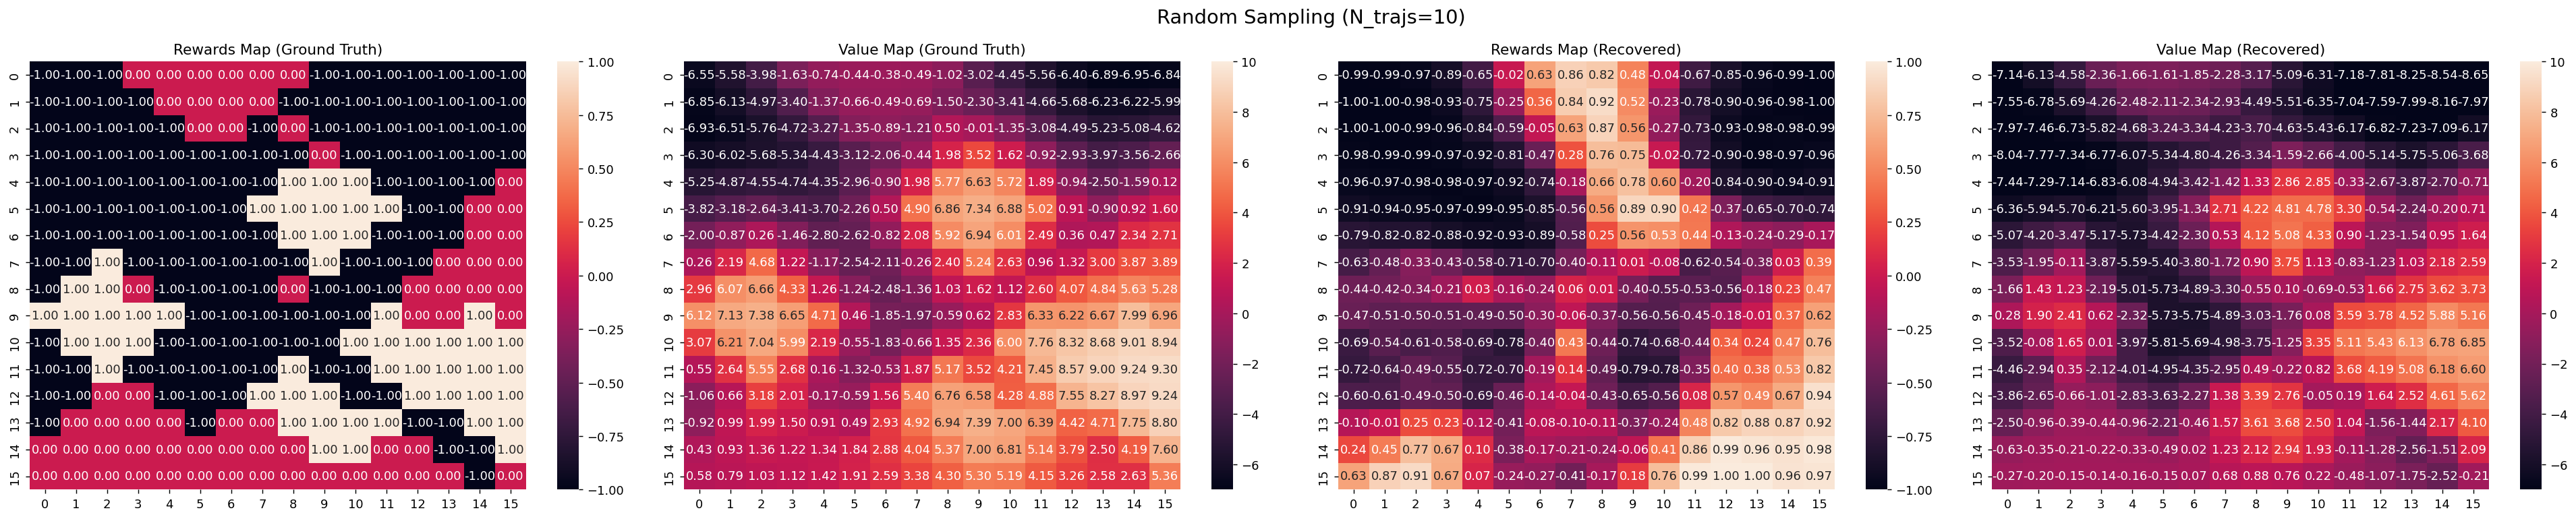

In [49]:
visualizer = Visualizer(history_deepmaxent_random, file_path=None, figsize=(30, 6), dpi=130)
n_trajs = 10
visualizer.draw_value_maps(search_idx=n_trajs)

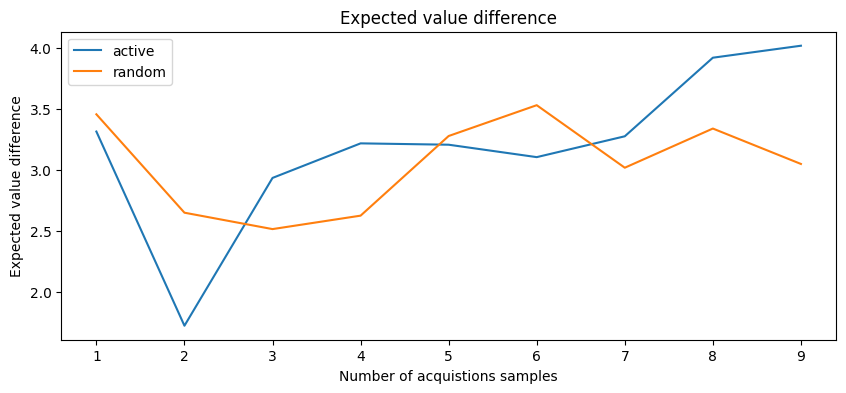

In [50]:
evd_act = get_evd(history_deepmaxent_active)
evd_rand = get_evd(history_deepmaxent_random)
draw_evd(evd_act[None, :], evd_rand[None, :])

## experiment

In [3]:
import pickle 
with open('exp_results_objectworld.pkl', 'rb') as f:
    exp_results = pickle.load(f)

In [7]:
print(exp_results.keys())
evd_acts = np.array(exp_results['deepmaxent_active'])
evd_rands = np.array(exp_results['deepmaxent_random'])
print(evd_acts.shape, evd_rands.shape)

dict_keys(['deepmaxent_active', 'deepmaxent_random'])
(30, 9) (30, 9)


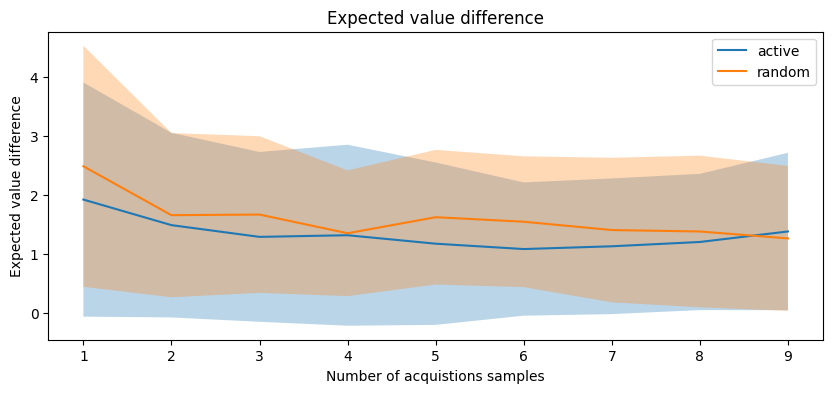

In [8]:
draw_evd(evd_acts, evd_rands)